# Задача: Закон Архимеда

Выполнил Бекетов Е.В. \
студент группы 3823М1ПМвм

## Описание задачи

Шар радиуса $R$ и плотности $\rho$ плавает в жидкости плотности $\rho_0$.\
Требуется определить, на какую глубину погрузится в жидкость этот шар. \
Задача сводится к решению кубического уравнения.

## Требования к задаче

1. Вывести это кубическое уравнение
2. Решите его численно (используя scipy.optimize.brentq или другой метод) для значений: \
    2a. $R = 1, \rho = 500, \rho_0 = 1000$ \
    2b. $R = 1, \rho = 755, \rho_0 = 997$ \
    Уравнение имеет три решения. Какие из них надо отбросить?
3. Построить график зависимости глубины погружения шара единичного радиуса от значения $\frac{\rho}{\rho_0}$

## Теоретическая справка о законе Архимеда

Закоон Архимеда -- закон гидростатики и аэростатики. \
Звучит следующим образом: на тело, погружённое в жидкость или газ, действует выталкивающая сила (также называется архимедовой силой или гидростатической подъёмной силой), численно равная весу объёма жидкости или газа, вытесненного телом. \
Так как сила Архимеда обусловлена силой тяжести, то в невесомости она не действует. \
В соответствии с определением закона выполняется:
$$F_A = \rho g V$$
где: \
    $\rho$ -- плотность жидкости или газа, СИ [$\frac{кг}{м^3}$] \
    $g$ -- ускорение свободного падения, СИ [$\frac{м}{с^2}$] \
    $V$ -- объём части тела, погружённой в жидкость или газ, СИ [$м^3$] \
    $F_A$ -- сила Архимеда, СИ [Н]

Пусть у нас имеется шар находящийся в жидкости, известно, что на него действует сила тяжести, которая тянет его на дно и сила Архимеда, которая выталкивает его. Очевидно, что векторы этих сил противоположно направлены, однако есть 3 возможных случая:
$$1. \ F_A < F_{тяжести} - \text{тело уходит на дно}$$
$$2. \ F_A = F_{тяжести} - \text{тело находится в состоянии когда не тонет и не выталкивается жидкостью}$$
$$3. \ F_A > F_{тяжести} - \text{тело плавает}$$
Собственно ниже на картинке представлены все три случая

<center>
<figure style="display: flex; justify-content: center;">
    <img src="https://cdn-user84060.skyeng.ru/uploads/60d61a4dc1482973707069.png" width="300" height="320"/>
    <img src="https://cdn-user84060.skyeng.ru/uploads/60d61a7fa1097444213017.png" width="300" height="320"/>
    <img src="https://cdn-user84060.skyeng.ru/uploads/60d61ab92e13d540958443.png" width="300" height="320"/>
</figure>
<figcaption>
Три возможных случая (1 -- тело тонет; 2 -- тело неподвижно; 3 -- тело плавает)
</figcaption>

## Вывод кубического уравнения

Сила тяжести для шара выглядит следующим образом:
$$F_{тяж} = \rho g V = \rho g \frac{4}{3} \pi R^3$$
т.к. объем шара равен $\frac{4}{3} \pi R^3$

Архимедова же сила действующая на шар равна:
$$F_A = \rho_0 g V_{погруж} = \rho_0 g \frac{1}{3} \pi h^2(3R - h)$$
где $V_{погруж} = \frac{1}{3} \pi h^2(3R - h)$ -- объем погруженной части, а $h$ -- высота погружения

При равенстве этих сил имеем следующее выражение:
$$\rho_0 g \frac{1}{3} \pi h^2(3R - h) = \rho g \frac{4}{3} \pi R^3 => \rho_0 h^2(3R - h) = \rho 4 R^3$$
выразив $h^3$ получаем следующее кубическое уравнение:
$$h^3 - 3 R h^2 + 4R^3\frac{\rho}{\rho_0} = 0$$
очевидно, что это уравнение имеет 3 корня, т.к. с физической точки зрения не может быть 3 высоты погружения, то подойдет только один, выясним какой именно.

Рассмотрим граничный случай, пусть $R = 1, \ \frac{\rho}{\rho_0} = 1$ -- то есть тело погружено в жидкость и находится в покое, тогда
$h^3 - 3h^2 + 4 = 0$ имеет следующие корни $-1, 2, 2$, подходит тот, что вписывается в интервал $[0, 2R]$ так как глубина погружения не может быть больше диаметра, в качестве доказательства верности корня подставим $R = 1, \ h = 2, \ \rho = \rho_0 =  1$ в это равенство:
$$\rho_0 h^2(3R - h) = \rho 4 R^3 => 4 = 4$$
получилось верное тождество, с точки зрения физики это означает что шар находится в состоянии покоя

Выведя это кубическое уравнение можно приступать к программной реализации

## Программная реализация

In [ ]:
# Импортируем ключевые библиотеки
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import brentq

# Кубическое уравнение
def cubic_equation(h, R, rho, rho0):
    return h**3 - 3*R*h**2 + 4*R**3*rho/rho0

# Две тестовые задачи
def numerical_solution(flag_test):
    R = 1
    if flag_test == 0:
        rho = 500
        rho0 = 1000
    elif flag_test == 1:
        rho = 755
        rho0 = 997        
    # Т.к. знаем, что подходящий корень не больше 2R сделали условие [0, 2*R]
    return brentq(lambda h: cubic_equation(h, R, rho, rho0), 0, 2*R)

Решим кубическое уравнение численно с помощью классического метода Брента из scipy.optimize.brentq \
Для проверки правильности написанного кода сверимся с онлайн решателем с сайта https://planetcalc.ru/1122/

In [2]:
for i in range(2):
    print(f'Корень теста {i + 1}: {numerical_solution(flag_test=i)}')

Корень теста 1: 1.0
Корень теста 2: 1.3583709113457798


Результаты с сайта: \
Корень теста 1: 0.9999999999999999 \
Корень теста 2: 1.3583709113457794

Результат совпадает до 16 знака =)

Теперь построим график зависимости глубины погружения шара единичного радиуса от значения $\frac{\rho}{\rho_0}$ \
Для удобства пусть $\rho_0 = 1000, \ R = 1$

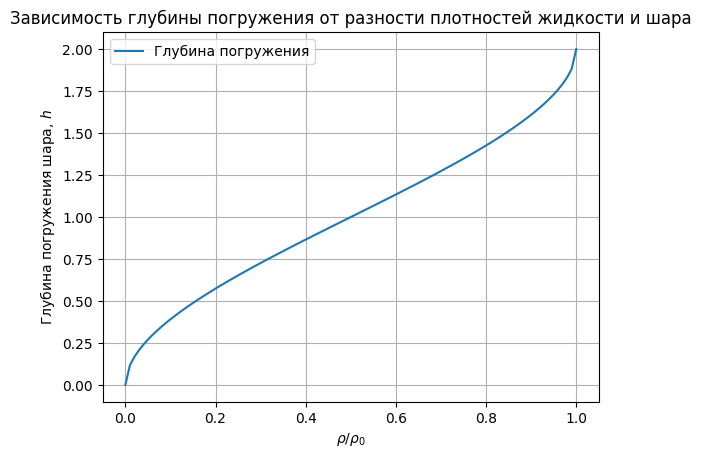

In [9]:
def depth_plot():
    h = []
    rho0 = 1000
    rho = np.linspace(0.001, rho0, 100)
    for density in rho:
        h.append(brentq(lambda h: cubic_equation(h, 1, density, rho0), 0, 2))

    plt.plot(rho / rho0, h, label = 'Глубина погружения')
    plt.xlabel('$\\rho / \\rho_0$')
    plt.ylabel('Глубина погружения шара, $h$')
    plt.title('Зависимость глубины погружения от разности плотностей жидкости и шара')
    plt.grid()
    plt.legend()
    plt.show()
    

depth_plot()

В итоге наглядно видно, что чем ближе плотность шара к плотности воды, тем больше он погружается в воду и когда они сравняются шар полностью погрузится, что и видно на графике выше

## Заключение

В итоге хочется сделать небольшое заключение по данной работе. Спустя почти 6 лет я вновь притронулся к закону Архимеда, потому что последний раз я использовал его в школе, было весело вернуться снова к этой задаче, с тем багажом знаний, который я получил за годы в университете. Я освежил знания и самостоятельно вывел уравнение глубины шара в зависимости от его плотности, написал простенькую, но наглядную программу для демонстрации графика этой зависимости.


ИНТЕРЕСНЫЙ ФАКТ! \
Согласно легенде, сиракузский царь Гиерон II подозревал своего ювелира в обмане при изготовлении золотой короны. Он поручил Архимеду раскрыть обман и доказать, что корона не из чистого золота (часть которого мастер якобы присвоил), а из сплава золота и серебра. В то время существовали инструменты, позволяющие достаточно точно измерить вес, и было известно, что плотность золота примерно вдвое больше плотности серебр, но чтобы проверить состав короны на чистоту, требовалось также знать её объём.

Архимед долго бился над решением предложенной задачи, пока решение не пришло к нему случайно во время купания, когда при его погружении в ванну вода начала выливаться на пол: он понял, что объём вытесненной воды равен объёму тела, погружённого в воду (принцип, который иногда путают с законом Архимеда -- гидростатическим законом о выталкивающей силе), а значит, можно точно измерить объём сложных по форме объектов. От своего открытия Архимед пришёл в такой восторг, что голый с криками "Эврика!" побежал из купальни домой, чтобы испробовать свою теорию. Затем он продемонстрировал опыт перед Гиероном, погрузив в воду корону и золотой слиток того же веса. Корона вытеснила больше воды, а это означало, что часть золота была заменена серебром, которое по весу легче, но имеет больший объём.